In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, gamma=1, d=1, theta=0):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.d = d
        self.theta = theta

    def _kernel(self, x1, x2):
        if self.kernel == "poly":
            self.gamma = 1
            self.d = 2
            self.theta = 1
        return (self.gamma * np.dot(x1, x2.T) + self.theta)**self.d

    
    # Problem One: Lagrange's steepest descent by the undetermined multiplier method
    def _lamda_update(self, X, y):
        for i in range(len(X)):
            self.lamda[i] += self.lr * (1 - np.dot(self.lamda*y[i]*y.T, self._kernel(X[i], X)))
            self.lamda = np.where(self.lamda >= 0, self.lamda, 0)


    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        self.lamda = np.random.rand(len(X))

        self.ylabels = np.unique(y)
        y = np.where(y==self.ylabels[0], -1, 1)

        for i in range(self.iter):
            self._lamda_update(X, y)

            if self.verbose:
                # Output the learning process when verbose is set to True
                print(
                        "n_iter", i,
                        "lamda", self.lamda,
                    )
        # Problem Two: Support vector determination
        self.index_sv = np.where(self.lamda > self.threshold)
        self.X_sv = X[self.lamda > self.threshold]
        self.n_sv = len(self.X_sv)
        self.lam_sv = self.lamda[self.lamda > self.threshold]
        self.y_sv = y[self.lamda > self.threshold]

    # Problem Three: Estimation
    def predict(self, X):
        """
        Estimate the label using the SVM classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """
        y_pred = np.dot(self.lam_sv * self.y_sv, self._kernel(X, self.X_sv).T)
            
        return np.where(y_pred >= 0, self.ylabels[1], self.ylabels[0])

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [8]:
svc = ScratchSVMClassifier(num_iter=1000, lr=0.001,verbose=False)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred

[0 1]


array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
precision = precision_score(y_test, y_pred)
print(precision)
recall = recall_score(y_test, y_pred)
print(recall)

1.0
1.0
1.0


In [10]:
from sklearn.svm import SVC

svc_sk = SVC()
svc_sk.fit(X_train, y_train)
y_pred_sk = svc_sk.predict(X_test)

In [11]:
accuracy_sk = accuracy_score(y_test, y_pred_sk)
print(accuracy_sk)
precision_sk = precision_score(y_test, y_pred_sk)
print(precision_sk)
recall_sk = recall_score(y_test, y_pred_sk)
print(recall_sk)

1.0
1.0
1.0


## Problem Five: Visualization of decision area

The total number of support vectors is: 29
[0 1]


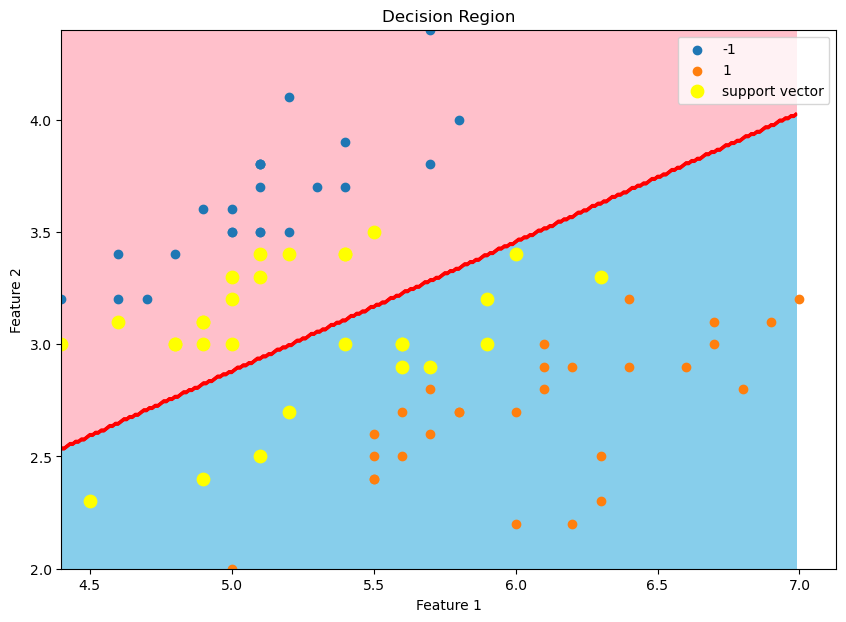

In [27]:
from matplotlib.colors import ListedColormap

def decision_region(X, y, model):
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]), np.max(X[:, 0]), 0.01),
        np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.01)
    )

    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]

    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title('Decision Region')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.contourf(mesh_f0, mesh_f1, y_pred, cmap=ListedColormap(["pink", "skyblue"]))
    plt.contour(mesh_f0, mesh_f1, y_pred, colors="red")
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label="-1")
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label="1")
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color="yellow", s=80, label="support vector")
    plt.legend(loc="upper right")
    plt.show()

print(f"The total number of support vectors is: {svc.n_sv}")

fig, ax = plt.subplots(figsize = (10,7))
decision_region(X_train, y_train, svc)

In [28]:
print(svc_sk.n_support_)

[12 12]


## Problem Six (Advance task): Creation of polynomial kernel function

In [29]:
svc2 = ScratchSVMClassifier(num_iter=1000, lr=0.001,verbose=False, kernel="poly")
svc2.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)

[0 1]


In [30]:
accuracy2 = accuracy_score(y_test, y_pred2)
print(accuracy2)
precision2 = precision_score(y_test, y_pred2)
print(precision2)
recall2 = recall_score(y_test, y_pred2)
print(recall2)

1.0
1.0
1.0


[0 1]


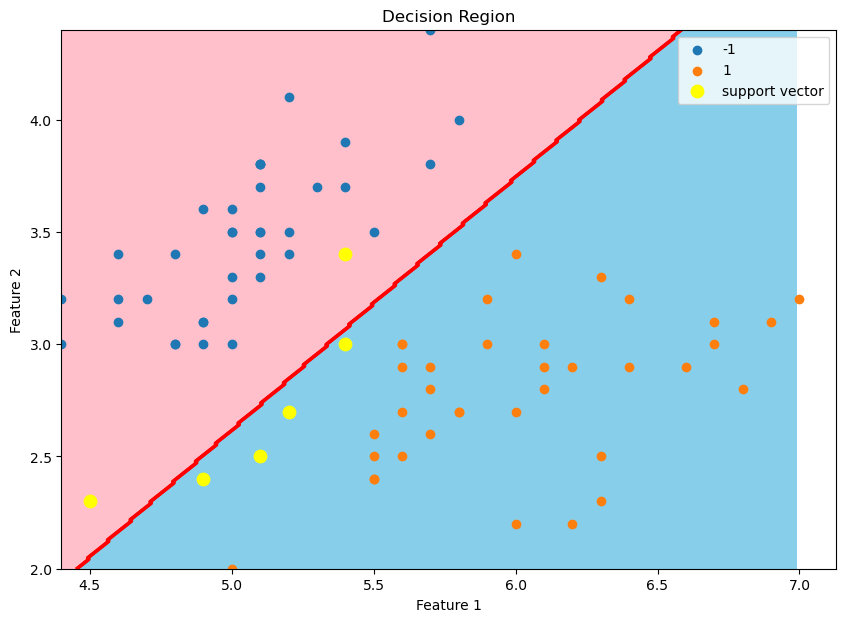

In [33]:
fig, ax = plt.subplots(figsize = (10,7))

decision_region(X_train, y_train, svc2)

I suspect that the current dataset (a subset of the iris dataset with binary targets) does not adequately demonstrate the difference in the decision boundary of the a linear kernel and a polynomial kernel, so I will visualize the decision boundary using a custom generated dataset and see the changes.

In [34]:
np.random.seed(seed=0)

n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0, 0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) * (-1))).astype(np.int64)
random_index = np.random.permutation(np.arange(n_samples))
sample1_X = X[random_index]
sample1_y = y[random_index]


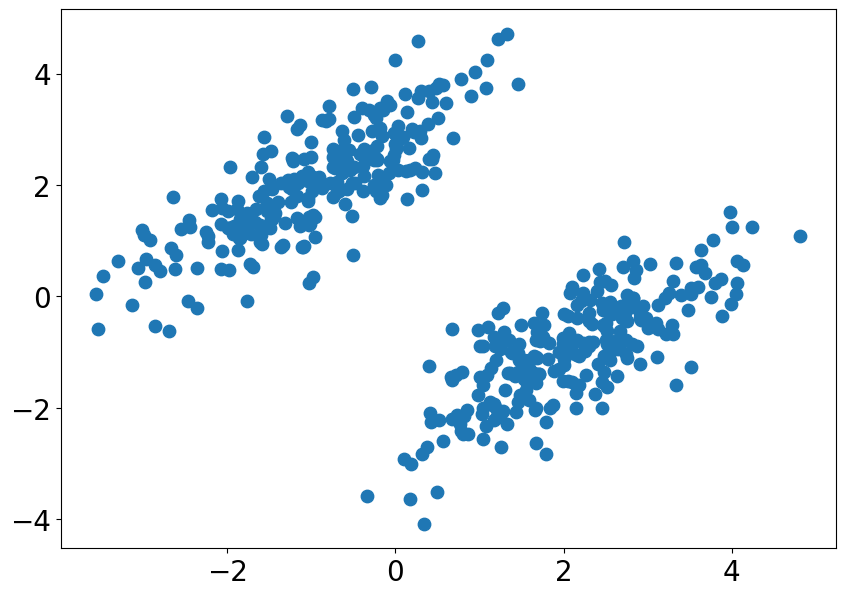

In [37]:
fig = plt.subplots(figsize=(10,7))
plt.rcParams["font.size"] = 20
plt.scatter(sample1_X[:,0], sample1_X[:,1], s=80)

In [38]:
X = sample1_X
y = sample1_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [42]:
svc3 = ScratchSVMClassifier(num_iter=2000, lr=0.01,verbose=False, kernel= "poly")
svc3.fit(X_train, y_train)
y_pred3 = svc3.predict(X_test)
y_pred3

[-1  1]
[-2.61419602  3.11938187  1.90923656 -1.74339595 -1.98258291  2.99287434
  2.62157204 -2.09217241 -2.16542284  2.5334134  -1.28426516  3.26995997
 -2.46780601 -1.9997173  -3.2291092   2.29125125  3.44076762  3.05325728
  1.6349704   2.3238349  -1.80410328 -2.37865123  1.87867552  1.89483071
 -1.61377377  1.75805468  2.2223532   2.68074794  2.22668627 -1.1344062
 -1.96968365  2.83947375  3.19862651 -2.60622691  2.93672389 -1.28705682
  2.30173402 -1.76491965 -2.15166797  3.26912642 -1.4179727   1.89051094
 -1.73433842  1.96537863 -3.32377635  1.8072991  -2.15962127  2.67991263
 -1.51147095  1.83996762 -1.54361767 -1.68312586 -2.46353347  2.4615251
  2.20906959  2.3930266   2.25801677  2.29789731  2.39414372  2.34939873
  3.23071583  2.18548577  3.15787993 -2.53061655  2.08772933 -2.15739419
 -2.1218356  -0.91666532 -1.58811614  2.79563846  1.49687911  2.39128126
  2.50673533  3.48266196  2.27297812 -1.68193299  3.75182168 -0.843062
  4.12033246 -1.02676094  2.88031602  3.1696483

array([-1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1])

The total number of support vectors is: 3
[-1  1]


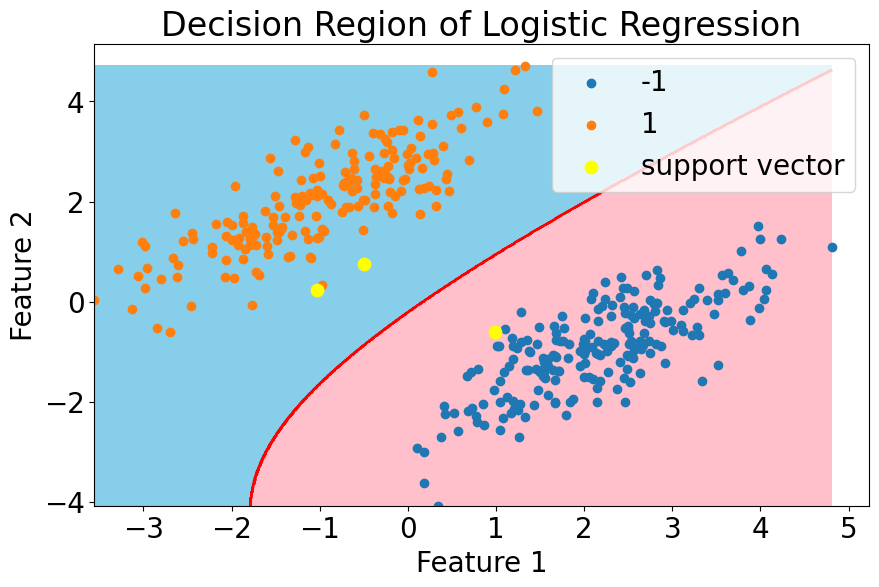

In [40]:
def decision_region(X, y, model):
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]), np.max(X[:, 0]), 0.01),
        np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.01)
    )

    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]

    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title('Decision Region of Logistic Regression')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.contourf(mesh_f0, mesh_f1, y_pred, cmap=ListedColormap(["pink", "skyblue"]))
    plt.contour(mesh_f0, mesh_f1, y_pred, colors="red")
    plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], label="-1")
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label="1")
    plt.scatter(model.X_sv[:,0], model.X_sv[:,1], color="yellow", s=80, label="support vector")
    plt.legend(loc="upper right")
    plt.show()

print(f"The total number of support vectors is: {svc3.n_sv}")

fig, ax = plt.subplots(figsize = (10,6))

decision_region(X_train, y_train, svc3)

The decision region plot above shows that the SVM algorithm was able to capture the non-linear relationship in the dataset using the polynomial kernel.